In [54]:
import numpy as np
import scipy as sc
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# A signal composed different frequency

In [123]:
t_n = 1 #### total span of data take as 1
N = 1365 #### number of points in the data
T = t_n / N ### sample freq 
f_s = 1/T  ### max period
 
x_value = np.linspace(0,t_n,N)
amplitudes = [3,10, 5, 8, 10, 30]
frequencies = [240,60, 8, 3, 2, 1] ## number of total waves
print("Periodicities are :")
print([N/i for i in frequencies])
y_values = [(-1)*amplitudes[ii]*np.cos(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value1 = np.sum(y_values, axis=0)
composite_y_value = np.sum(y_values, axis=0)+40*x_value

Periodicities are :
[5.6875, 22.75, 170.625, 455.0, 682.5, 1365.0]


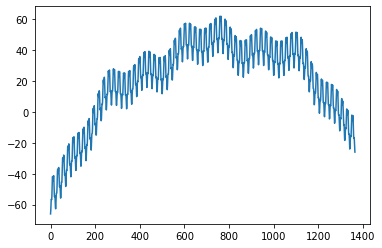

In [124]:
plt.plot(composite_y_value)

## butterworth bandpass filter


In [125]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [126]:
lowcut = 2/100;highcut = 2/20;fs=1
y_butter_bandpass = butter_bandpass_filter(composite_y_value1, lowcut, highcut, fs, order=3)

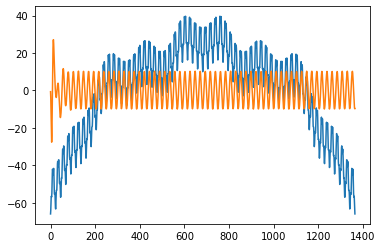

In [127]:
plt.plot(composite_y_value1)
plt.plot(y_butter_bandpass)

## FFT filter


In [128]:
def filter_signal_scipy(signal,sample_freq,ltime_period,htime_period,keep_mean):
    filter_signal=np.zeros(signal.shape)
    if any(np.isnan(signal)):
        raise ValueError('There is NaN in the signal')
    else:
        hf=1./ltime_period
        lf=1./htime_period

        temp_fft = sc.fftpack.fft(signal)

        fftfreq = np.fft.fftfreq(len(signal),sample_freq) ### daily data it is 1./365 ## monthly data 1./12 ## yearly data=1
          
        i1=(np.abs(fftfreq) >= lf) & (np.abs(fftfreq) <= hf)  
        inv_fft=np.zeros(temp_fft.size,dtype=complex)
        inv_fft[i1]=temp_fft[i1]
        if keep_mean:
            inv_fft[0]=temp_fft[0]
        filter_signal= np.real_if_close(sc.fftpack.ifft(inv_fft))
    
    return filter_signal

In [129]:
y_fft_bandpass=filter_signal_scipy(composite_y_value1,1,20,100,0)


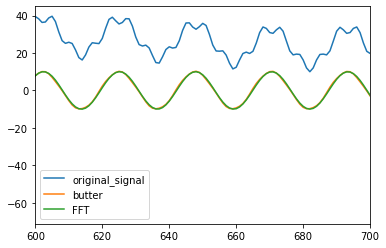

In [131]:
plt.plot(composite_y_value1,label='original_signal')
plt.plot(y_butter_bandpass,label='butter')
plt.plot(y_fft_bandpass,label='FFT')
plt.xlim(600,700)
plt.legend()